In [19]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 


In [2]:
# Load your enriched Netflix dataset
df = pd.read_csv("Netflix.csv")

# Clean column names 
df.columns = df.columns.str.lower().str.strip().str.replace(" ", "_")

In [4]:
# Based on title + genre + theme
df['description'] = df['title'] + " is a " + df['primary_genre'].fillna('genre') + " story exploring " + df['theme'].fillna('human emotions') + " in a " + df['tone'].fillna('dramatic') + " setting."


In [5]:
# Define function to extract sentiment polarity and subjectivity
def get_sentiment(text):
    blob = TextBlob(str(text))
    return pd.Series([blob.sentiment.polarity, blob.sentiment.subjectivity])

# Apply to description column
df[['sentiment_polarity', 'sentiment_subjectivity']] = df['description'].apply(get_sentiment)

In [6]:
# Categorize into sentiment labels
def categorize_sentiment(p):
    if p > 0.2:
        return 'Positive'
    elif p < -0.2:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_label'] = df['sentiment_polarity'].apply(categorize_sentiment)

In [7]:
df.to_csv("Netflix.csv", index=False)
print("Sentiment analysis complete. File saved as Netflix_Sentiment_Enriched.csv")


Sentiment analysis complete. File saved as Netflix_Sentiment_Enriched.csv


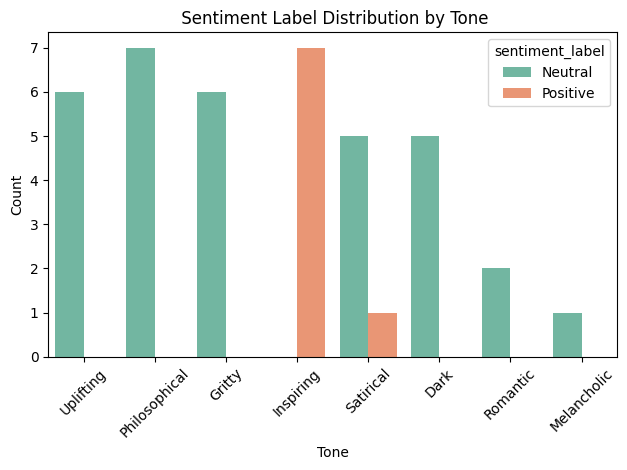

In [12]:


#  Sentiment Label vs Tone
sns.countplot(data=df, x="tone", hue="sentiment_label", palette="Set2")
plt.title(" Sentiment Label Distribution by Tone")
plt.xlabel("Tone")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show() 

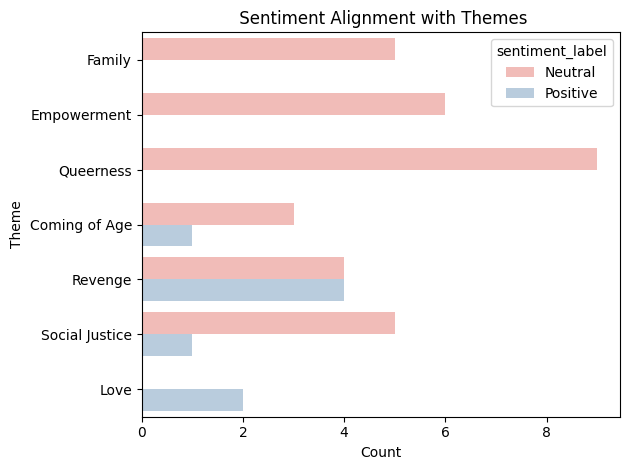

In [13]:
# Sentiment Label vs Theme
sns.countplot(data=df, y="theme", hue="sentiment_label", palette="Pastel1")
plt.title(" Sentiment Alignment with Themes")
plt.xlabel("Count")
plt.ylabel("Theme")
plt.tight_layout()
plt.show()

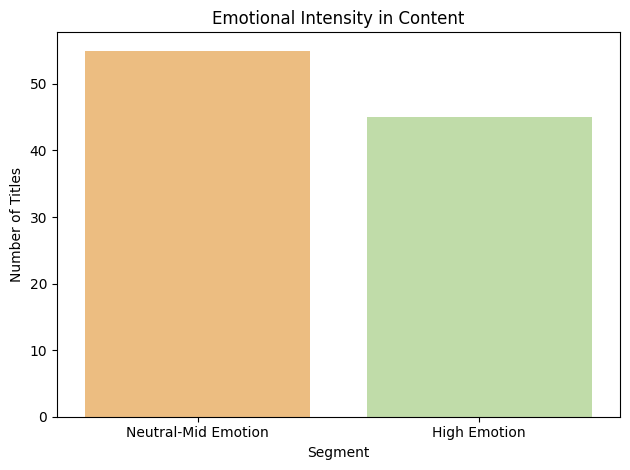

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np # Assuming you might need numpy for sentiment_polarity

# Sample DataFrame (replace with your actual df)
data = {'sentiment_polarity': np.random.uniform(-1, 1, 100)}
df = pd.DataFrame(data)

# Define polarity thresholds
df['emotional_intensity'] = df['sentiment_polarity'].apply(
    lambda x: 'High Emotion' if abs(x) > 0.5 else 'Neutral-Mid Emotion'
)

# Compare count - CORRECTED LINE
sns.countplot(data=df, x="emotional_intensity", hue="emotional_intensity", palette="Spectral", legend=False)
plt.title("Emotional Intensity in Content")
plt.xlabel("Segment")
plt.ylabel("Number of Titles")
plt.tight_layout()
plt.show()

In [5]:
import pandas as pd

df = pd.read_csv("Netflix.csv")
 


df.to_csv("Netflix_Sentiment_Enriched.csv", index=False)
print("Sentiment analysis complete. File saved as Netflix_Sentiment_Enriched.csv")

Sentiment analysis complete. File saved as Netflix_Sentiment_Enriched.csv
